**Assignment 2**

**Python programming**



1. **Assignment date: 25-09-2022**
2. **Student name: Muthupandeeswari P**
3. **Student roll number: 923819106031**
4. **Maximum marks: 2** 







**importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5642,5643,15737778,Dickson,782,Spain,Female,41,4,0.00,1,1,0,132943.88,0
2380,2381,15654463,Moore,841,France,Male,34,4,0.00,2,1,0,141582.66,0
5867,5868,15625740,Enriquez,627,Germany,Male,62,3,143426.34,2,1,1,143104.30,0
19,20,15568982,Hao,726,France,Female,24,6,0.00,2,1,1,54724.03,0
7450,7451,15679801,Hsueh,712,Spain,Female,39,5,163097.55,2,1,1,23702.42,0
4818,4819,15588587,Stetson,752,France,Female,36,1,86837.95,1,1,1,105280.55,0
3553,3554,15626612,Yin,741,Spain,Male,40,4,104784.23,1,1,0,135163.76,1
8228,8229,15632609,Burdekin,554,France,Female,39,10,160132.75,1,1,0,32824.15,0
3654,3655,15632365,Booth,542,Germany,Male,33,8,142871.27,2,0,0,77737.86,0
7316,7317,15811690,Bayley,793,Germany,Male,54,2,128966.13,1,0,0,18633.40,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.drop('RowNumber',axis='columns',inplace=True)
df.drop('CustomerId',axis='columns',inplace=True)
df.drop('Surname',axis='columns',inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Univariate analysis**

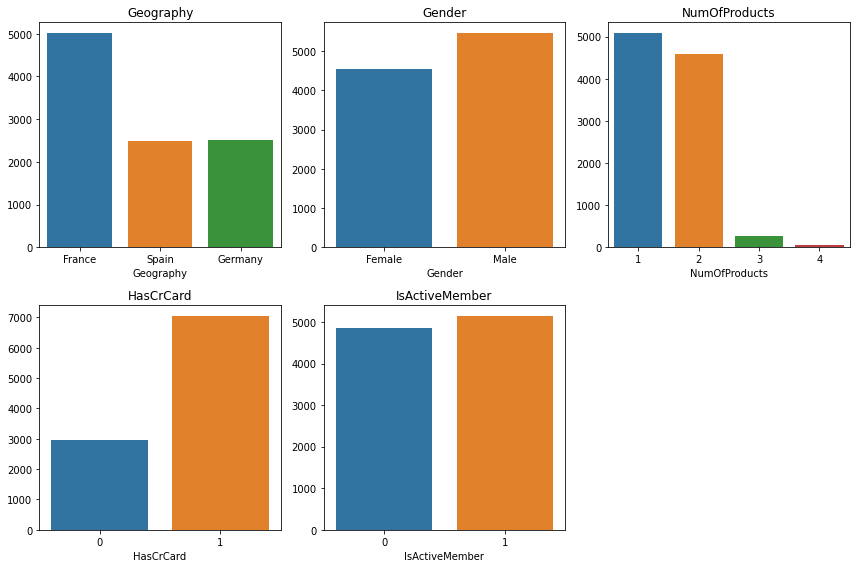

In [ ]:
fig, axes = plt.subplots(2,3,figsize=(12,8))
valid_col =['Geography', 'Gender',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember','CresditScore','Age','Tenure','Balance','EstimatedSalary','Exited']
for i, ax in enumerate(axes.flatten()):
    if i == 5:
        ax.axis('off')
        break
    sns.countplot(data=df,x=valid_col[i],ax=ax)
    ax.set_ylabel(None)
    ax.set_title(label=valid_col[i])
plt.tight_layout()

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


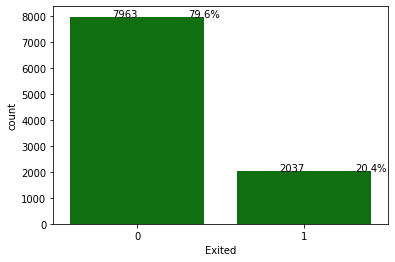

In [ ]:
total=float(len(df))
ax=sns.countplot(df['Exited'],color="Green")
for p in ax.patches:
        percent = '{:.1f}%'.format(100 * p.get_height()/total)
        x=p.get_x() + p.get_width()
        y=p.get_height()
        ax.annotate(percent,(x,y),ha='center')
        ax.annotate(y, (x - + p.get_width() +0.25, y+0.01))
plt.show()

**Bivariate analysis**

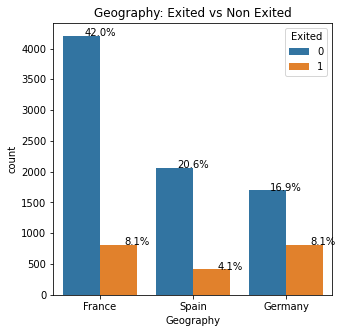

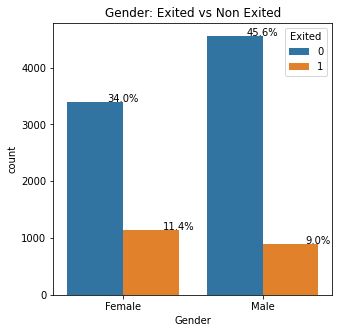

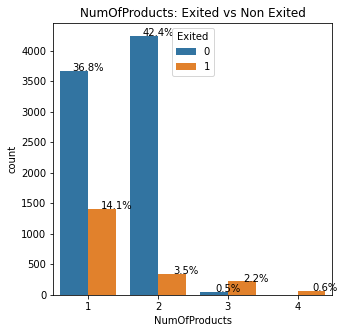

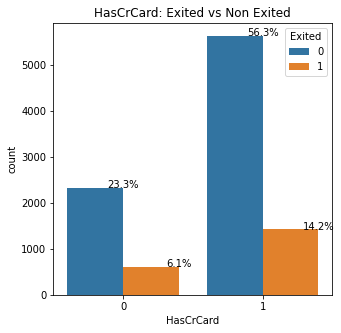

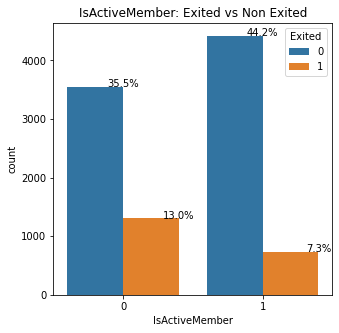

In [ ]:
total=float(len(df))
Excepted_col=['Tenure','Age','CreditScore','Balance',"EstimatedSalary"]
Accepted_col=['Geography', 'Gender','NumOfProducts', 'HasCrCard', 'IsActiveMember']
for column in Accepted_col:
    fig, ax = plt.subplots(figsize=(5,5))
    sns.countplot(data=df,x=column,hue='Exited',ax=ax)
    ax.set_title(column+': Exited vs Non Exited')
    ax.set_ylabel('count')
    for i in ax.patches:
        percent = '{:.1f}%'.format(100 * i.get_height()/total)
        x=i.get_x() + i.get_width()
        y=i.get_height()
        ax.annotate(percent,(x,y),ha='center')
    plt.show()

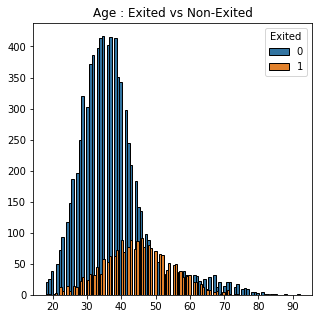

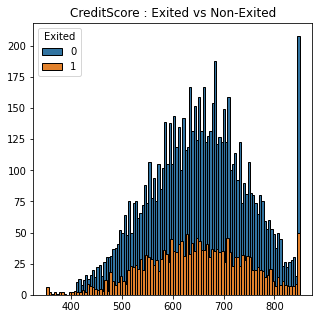

In [ ]:
df_exited=df[df['Exited']==1]
df_not_exited=df[df['Exited']==0]
Excepted_col=['Age','CreditScore']
for column in Excepted_col:
    plt.figure(figsize=(5,5))
    plt.hist(x=column,bins=100,data=df_not_exited,edgecolor='black',color='#3274a1')
    plt.hist(x=column,bins=100,data=df_exited,edgecolor='black',color='#e1812c')
    plt.title(column+' : Exited vs Non-Exited')
    plt.legend([0,1],title='Exited')

Multivariate **Analysis**

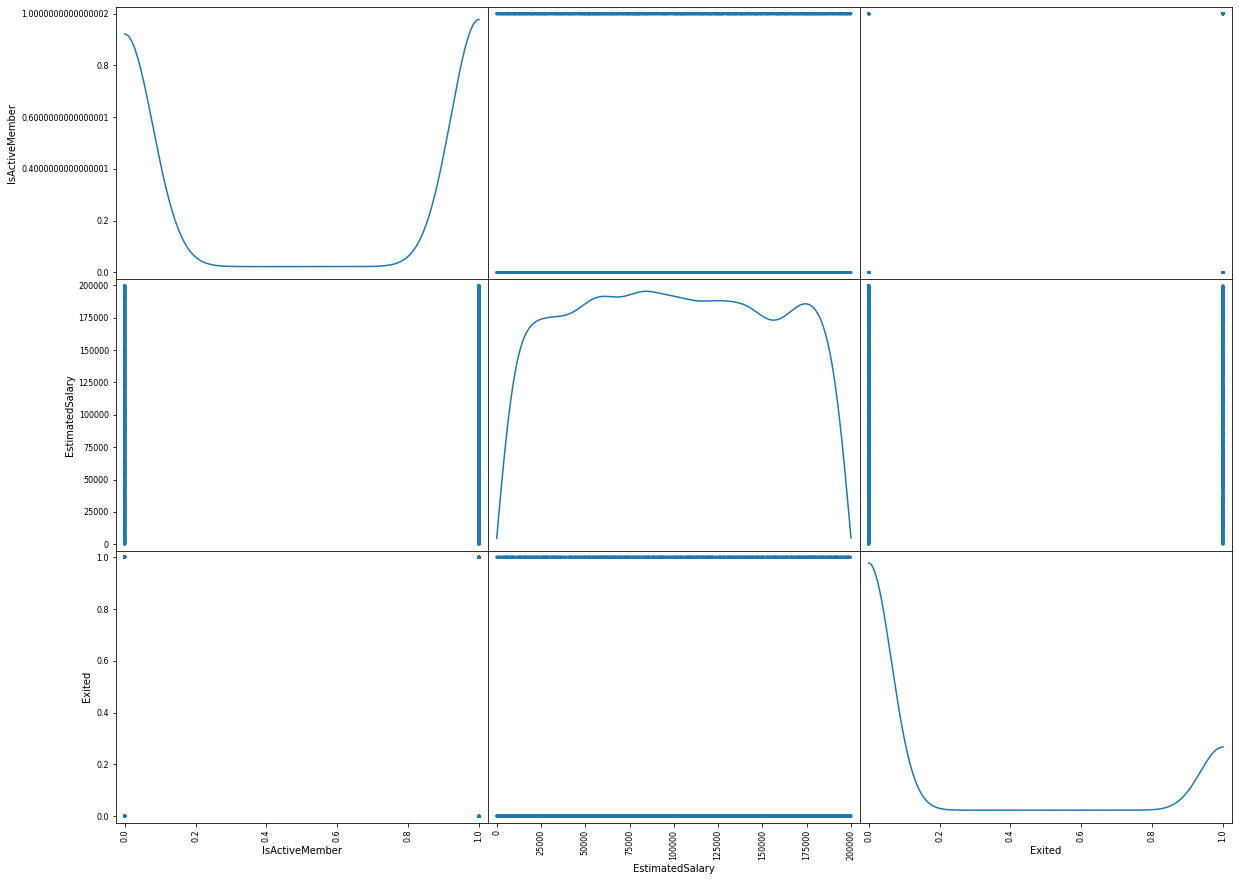

In [ ]:
pd.plotting.scatter_matrix(df.loc[:, "IsActiveMember":"Exited"], diagonal="kde",figsize=(20,15))
plt.show()

**Descriptive statistics**

In [ ]:
df.shape

(10000, 11)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [ ]:
df.isna().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CreditScore           650.528800
Age                    38.921800
Tenure                  5.012800
Balance             76485.889288
NumOfProducts           1.530200
HasCrCard               0.705500
IsActiveMember          0.515100
EstimatedSalary    100090.239881
Exited                  0.203700
dtype: float64

In [ ]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CreditScore           652.000
Age                    37.000
Tenure                  5.000
Balance             97198.540
NumOfProducts           1.000
HasCrCard               1.000
IsActiveMember          1.000
EstimatedSalary    100193.915
Exited                  0.000
dtype: float64

In [ ]:
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CreditScore           96.653299
Age                   10.487806
Tenure                 2.892174
Balance            62397.405202
NumOfProducts          0.581654
HasCrCard              0.455840
IsActiveMember         0.499797
EstimatedSalary    57510.492818
Exited                 0.402769
dtype: float64

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Missing values**

In [ ]:
df.isnull()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False


**Find the outliers and replace the outliers**

In [ ]:
df['Tenure']=np.where(df['Tenure']>10,np.median,df['Tenure'])
df['Tenure']

0        2
1        1
2        8
3        1
4        2
        ..
9995     5
9996    10
9997     7
9998     3
9999     4
Name: Tenure, Length: 10000, dtype: object

**Encoding**

In [ ]:
pd.get_dummies(df,columns=['Gender','Age'],prefix=['Age','Gender'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0,0,42,2,0.00,1.0,1,1,101348.88,1
1,608.0,2,0,41,1,83807.86,1.0,0,1,112542.58,0
2,502.0,0,0,42,8,159660.80,3.0,1,0,113931.57,1
3,699.0,0,0,39,1,0.00,2.0,0,0,93826.63,0
4,850.0,2,0,43,2,125510.82,1.0,1,1,79084.10,0


**Split the data into independent variables**

In [ ]:
x=df.iloc[:,:-2].values
x

array([[619.0, 0, 0, ..., 1.0, 1, 1],
       [608.0, 2, 0, ..., 1.0, 0, 1],
       [502.0, 0, 0, ..., 3.0, 1, 0],
       ...,
       [709.0, 0, 0, ..., 1.0, 0, 1],
       [772.0, 1, 1, ..., 2.0, 1, 0],
       [792.0, 0, 0, ..., 1.0, 1, 0]], dtype=object)

**Split the data into dependent variables**

In [ ]:
y=df.iloc[:,-1].values
y

array([1, 0, 1, ..., 1, 1, 0])

**Scale the independent variables**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
nm =MinMaxScaler()
N_independent = nm.fit_transform(x)
N_independent

array([[0.52371134, 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.50103093, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.28247423, 0.        , 0.        , ..., 0.66666667, 1.        ,
        0.        ],
       ...,
       [0.70927835, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.83917526, 0.5       , 1.        , ..., 0.33333333, 1.        ,
        0.        ],
       [0.88041237, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

**Split the data into training and testing**

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(N_independent,y,test_size=0.3)

In [ ]:
xtrain

array([[1.        , 0.        , 1.        , ..., 0.33333333, 1.        ,
        1.        ],
       [0.53402062, 1.        , 0.        , ..., 0.33333333, 1.        ,
        0.        ],
       [0.80412371, 0.        , 0.        , ..., 0.66666667, 1.        ,
        0.        ],
       ...,
       [0.37731959, 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.72989691, 0.        , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [0.75670103, 0.        , 1.        , ..., 0.33333333, 1.        ,
        1.        ]])

In [ ]:
xtest

array([[0.60412371, 0.        , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [0.87628866, 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.        ],
       [0.79793814, 0.        , 0.        , ..., 0.33333333, 1.        ,
        0.        ],
       ...,
       [0.66185567, 0.5       , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.61237113, 0.5       , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [0.68453608, 0.        , 1.        , ..., 0.33333333, 0.        ,
        1.        ]])

In [ ]:
ytrain

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
ytest

array([0, 0, 1, ..., 0, 0, 0])